In [1]:
# Import important libraries:
import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

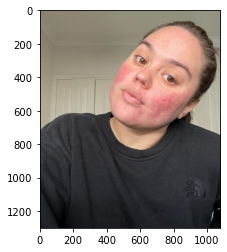

In [2]:
# Let's read an example from the training data:
redness24 = image.load_img("E:/my-works/Mentorness/skin-disease-classification/data/train/redness/redness21.jpg")
plt.imshow(redness24)

In [3]:
# Print the shape:
cv2.imread('E:/my-works/Mentorness/skin-disease-classification/data/train/redness/redness21.jpg').shape

(1300, 1080, 3)

In [4]:
# Image rescaling (normalization):
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [5]:
# Create our train and test datasets:
train_dataset = train.flow_from_directory('E:/my-works/Mentorness/skin-disease-classification/data/train/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'categorical')

validation_dataset = validation.flow_from_directory('E:/my-works/Mentorness/skin-disease-classification/data/validation/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'categorical')

Found 54 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [6]:
# Show our class indices:
train_dataset.class_indices

{'acne': 0, 'bags': 1, 'redness': 2}

## Now let's build a convolutional neural network to train our images:

In [7]:
# Build our model:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [8]:
# Compile our model:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model_fit = cnn.fit(
    train_dataset,
    steps_per_epoch = 3,
    epochs = 30,
    validation_data = validation_dataset
)

Epoch 1/30
3/3 [==============================] - 9s 3s/step - loss: 4.7527 - accuracy: 0.5556 - val_loss: 3.9118 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 7s 3s/step - loss: 2.0995 - accuracy: 0.3333 - val_loss: 1.0594 - val_accuracy: 0.5556
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 1.0318 - accuracy: 0.4444 - val_loss: 1.5300 - val_accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 1.4702 - accuracy: 0.3333 - val_loss: 1.0365 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 1.0082 - accuracy: 0.7778 - val_loss: 1.0428 - val_accuracy: 0.4444
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 1.0168 - accuracy: 0.7778 - val_loss: 1.0409 - val_accuracy: 0.4444
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.9779 - accuracy: 0.6667 - val_loss: 0.9441 - val_accuracy: 0.6667
Epoch 8/30
3/3 [=========================

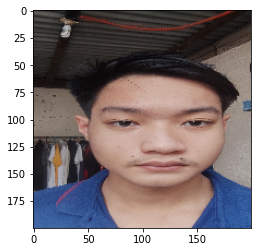

1/1 [==============================] - 0s 271ms/step
Has acne


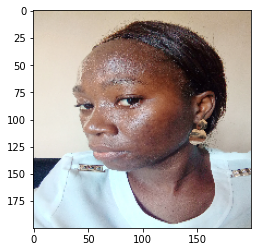

1/1 [==============================] - 0s 50ms/step
Has redness


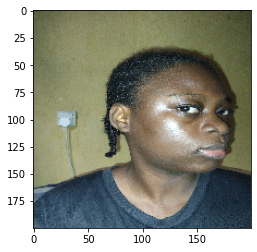

1/1 [==============================] - 0s 38ms/step
Has bags


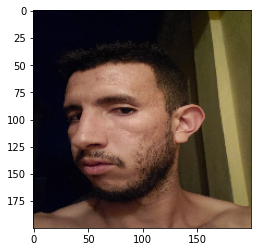

1/1 [==============================] - 0s 68ms/step
Has acne


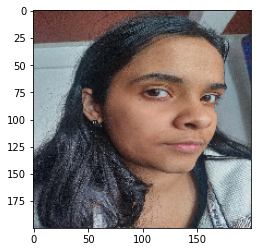

1/1 [==============================] - 0s 36ms/step
Has acne


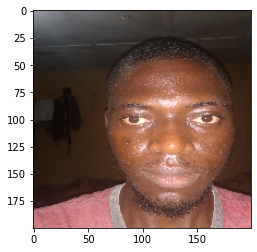

1/1 [==============================] - 0s 42ms/step
Has acne


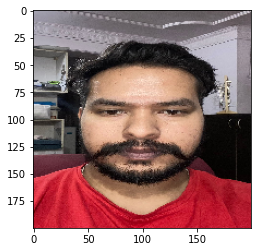

1/1 [==============================] - 0s 52ms/step
Has bags


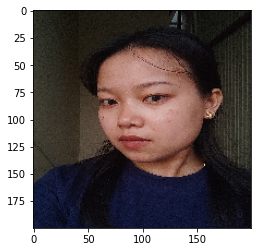

1/1 [==============================] - 0s 55ms/step
Has bags


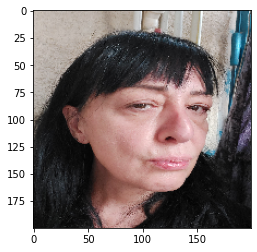

1/1 [==============================] - 0s 43ms/step
Has bags


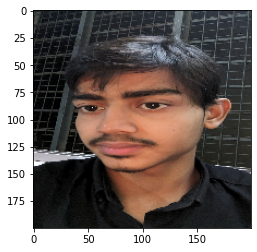

1/1 [==============================] - 0s 30ms/step
Has acne


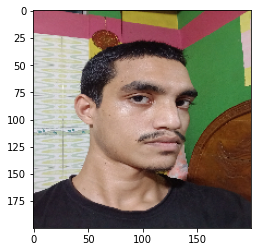

1/1 [==============================] - 0s 38ms/step
Has bags


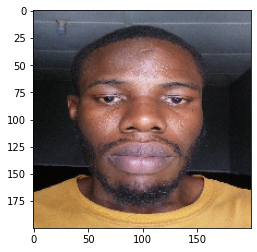

1/1 [==============================] - 0s 43ms/step
Has bags


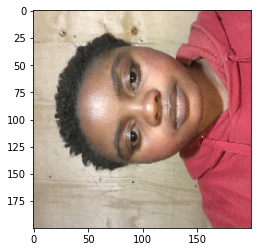

1/1 [==============================] - 0s 50ms/step
Has redness


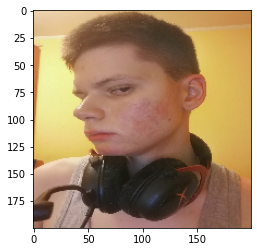

1/1 [==============================] - 0s 54ms/step
Has redness


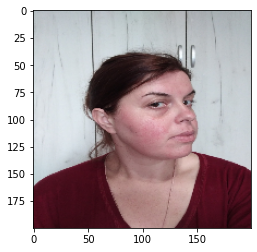

1/1 [==============================] - 0s 52ms/step
Has redness


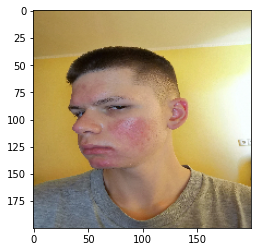

1/1 [==============================] - 0s 56ms/step
Has redness


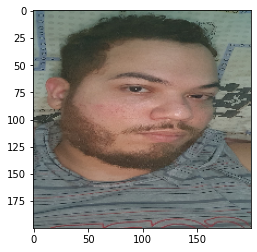

1/1 [==============================] - 0s 34ms/step
Has redness


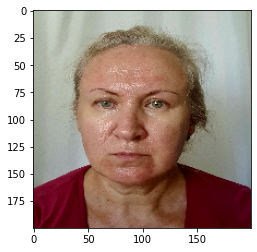

1/1 [==============================] - 0s 50ms/step
Has redness


In [10]:
# Time to test our model:
dir_path = "E:/my-works/Mentorness/skin-disease-classification/data/test/"

for file in os.listdir(dir_path):
    img = image.load_img(dir_path + '/' + file, target_size = (200, 200))
    plt.imshow(img)
    plt.show()
    
    test = image.img_to_array(img)
    test = np.expand_dims(test, axis = 0)
    test_images = np.vstack([test])
    
    disease_propa = cnn.predict(test_images)
    disease = np.argmax(disease_propa, axis = 1)[0]
    if disease == 0:
        print("Has acne")
    elif disease == 1:
        print("Has bags")
    else:
        print("Has redness")